Matplotlib is building the font cache; this may take a moment.


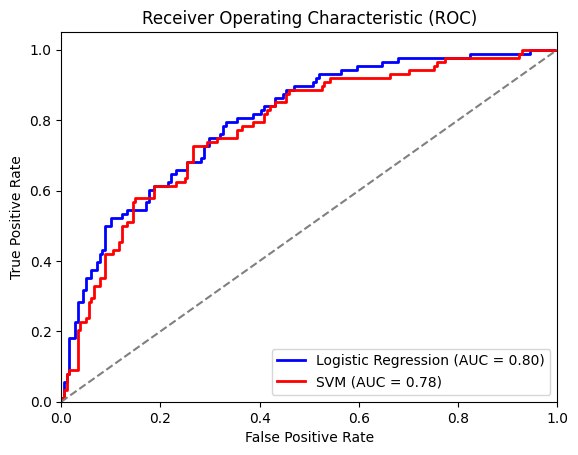

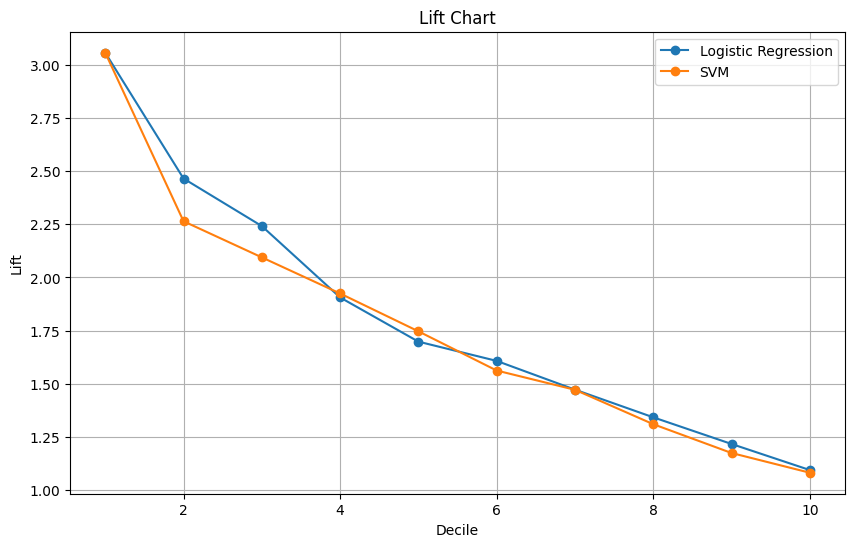

Logistic Regression Accuracy: 73.98%
Logistic Regression Error Rate: 26.02%
Logistic Regression Precision: 74.13%
Logistic Regression Recall: 73.98%
Logistic Regression Specificity: 80.11%
Logistic Regression F1-score: 60.67%
Logistic Regression Entropy: 171.11%
Logistic Regression Purity: 73.98%
Logistic Regression Training Error: 21.84%
Logistic Regression Generalization Error: 26.02%
Logistic Regression Adjusted Rand Index: 0.22
Logistic Regression Jaccard Coefficient: 0.44
Logistic Regression 95% CI: [0.68, 0.79]
Logistic Regression Accuracy Variance (Cross-Validation): 0.0013
SVM Accuracy: 74.72%
SVM Error Rate: 25.28%
SVM Precision: 73.66%
SVM Recall: 74.72%
SVM Specificity: 87.85%
SVM F1-score: 55.26%
SVM Entropy: 159.78%
SVM Purity: 76.21%
SVM Training Error: 22.04%
SVM Generalization Error: 25.28%
SVM Adjusted Rand Index: 0.22
SVM Jaccard Coefficient: 0.38
SVM 95% CI: [0.69, 0.80]
SVM Accuracy Variance (Cross-Validation): 0.0009


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, adjusted_rand_score, roc_curve, auc
import matplotlib.pyplot as plt

def plot_lift_chart(y_true, y_prob, model_name):
    # Create a DataFrame with true labels and predicted probabilities
    df_scores = pd.DataFrame({'True': y_true, 'Prob': y_prob})
    
    # Sort by probability in descending order
    df_scores = df_scores.sort_values(by='Prob', ascending=False).reset_index(drop=True)
    
    # Calculate cumulative true positives and total positives
    total_positives = df_scores['True'].sum()
    df_scores['Cumulative TP'] = df_scores['True'].cumsum()
    df_scores['Lift'] = df_scores['Cumulative TP'] / (np.arange(1, len(df_scores) + 1) / len(df_scores)) / total_positives
    
    # Calculate decile boundaries
    df_scores['Decile'] = np.ceil(np.arange(1, len(df_scores) + 1) / (len(df_scores) / 10)).astype(int)
    lift_by_decile = df_scores.groupby('Decile')['Lift'].max()
    
    # Plot Lift Chart
    plt.plot(lift_by_decile.index, lift_by_decile.values, marker='o', label=model_name)

def agresti_coull_interval(successes, trials, confidence=0.95):
    p = successes / trials
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    denominator = 1 + (z**2 / trials)
    centre_adjusted_probability = p + (z**2 / (2 * trials))
    adjusted_standard_deviation = np.sqrt((p * (1 - p) + (z**2 / (4 * trials))) / trials)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Calculate Purity
def calculate_purity(conf_matrix):
    total_instances = np.sum(conf_matrix)
    correct_classifications = np.sum(np.amax(conf_matrix, axis=1))
    purity = correct_classifications / total_instances
    return purity


def jaccard_index(TP, FP, FN):
    return TP / (TP + FP + FN)

df = pd.read_csv("/Users/rahulkisandabilkar/Documents/LR_SVM _Diabetes 2/diabetes.csv") #read the dataset


# Features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Step 2: Train and Evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
error_rate_log_reg = 1 - accuracy_log_reg
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
tn_log_reg, fp_log_reg, fn_log_reg, tp_log_reg = conf_matrix_log_reg.ravel()
specificity_log_reg = tn_log_reg / (tn_log_reg + fp_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)  # F1-score
entropy_log_reg = -np.sum((conf_matrix_log_reg / np.sum(conf_matrix_log_reg)) * np.log2(conf_matrix_log_reg / np.sum(conf_matrix_log_reg) + 1e-9))
purity_log_reg = calculate_purity(conf_matrix_log_reg)
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)
train_error_log_reg = 1 - accuracy_score(y_train, y_train_pred_log_reg)
generalization_error_log_reg = 1 - accuracy_score(y_test, y_test_pred_log_reg)

y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)


# Step 3: Train and Evaluate SVM
svm = SVC(kernel='rbf', random_state=0, probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
error_rate_svm = 1 - accuracy_svm
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()
specificity_svm = tn_svm / (tn_svm + fp_svm)
f1_svm = f1_score(y_test, y_pred_svm)  # F1-score
entropy_svm = -np.sum((conf_matrix_svm / np.sum(conf_matrix_svm)) * np.log2(conf_matrix_svm / np.sum(conf_matrix_svm) + 1e-9))
purity_svm = calculate_purity(conf_matrix_svm)
y_train_pred_svm = svm.predict(X_train)
train_error_svm = 1 - accuracy_score(y_train, y_train_pred_svm)
y_test_pred_svm = svm.predict(X_test)
generalization_error_svm = 1 - accuracy_score(y_test, y_test_pred_svm)

y_prob_svm = svm.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Compute confusion matrix
cm_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Compute Adjusted Rand Index
ari_log_reg = adjusted_rand_score(y_test, y_test_pred_log_reg)
ari_svm = adjusted_rand_score(y_test, y_test_pred_svm)


# Extract values for logistic regression
TP_log_reg = cm_log_reg[1, 1]
FP_log_reg = cm_log_reg[0, 1]
FN_log_reg = cm_log_reg[1, 0]

# Extract values for SVM
TP_svm = cm_svm[1, 1]
FP_svm = cm_svm[0, 1]
FN_svm = cm_svm[1, 0]

# Compute Jaccard Coefficient
jaccard_log_reg = jaccard_index(TP_log_reg, FP_log_reg, FN_log_reg)
jaccard_svm = jaccard_index(TP_svm, FP_svm, FN_svm)

# Compute the number of successes and total samples
n_success_log_reg = np.sum(y_test == y_test_pred_log_reg)
n_total = len(y_test)
success_log_reg = n_success_log_reg
success_svm = np.sum(y_test == y_test_pred_svm)

# Calculate Confidence Intervals using Agresti-Coull interval
ci_log_reg_ac = agresti_coull_interval(success_log_reg, n_total)
ci_svm_ac = agresti_coull_interval(success_svm, n_total)

# Cross-validation scores
log_reg_scores = cross_val_score(log_reg, X, y, cv=10)
svm_scores = cross_val_score(svm, X, y, cv=10)

# Calculate variance of scores
var_log_reg = np.var(log_reg_scores)
var_svm = np.var(svm_scores)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot lift chart for both classifiers
plt.figure(figsize=(10, 6))
plot_lift_chart(y_test, y_prob_log_reg, 'Logistic Regression')
plot_lift_chart(y_test, y_prob_svm, 'SVM')
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Print Accuracy &Error rate
print("Logistic Regression Accuracy: %.2f%%" % (100*accuracy_log_reg))
print("Logistic Regression Error Rate: %.2f%%" % (100*error_rate_log_reg))
print("Logistic Regression Precision: %.2f%%" % (100*precision_log_reg))
print("Logistic Regression Recall: %.2f%%" % (100*recall_log_reg))
print("Logistic Regression Specificity: %.2f%%" % (100*specificity_log_reg))
print("Logistic Regression F1-score: %.2f%%" % (100*f1_log_reg))
print("Logistic Regression Entropy: %.2f%%" % (100*entropy_log_reg))
print("Logistic Regression Purity: %.2f%%" % (100*purity_log_reg))
print("Logistic Regression Training Error: %.2f%%" % (100*train_error_log_reg))
print("Logistic Regression Generalization Error: %.2f%%" % (100*generalization_error_log_reg))
print("Logistic Regression Adjusted Rand Index: {:.2f}".format(ari_log_reg))
print("Logistic Regression Jaccard Coefficient: {:.2f}".format(jaccard_log_reg))
print('Logistic Regression 95% CI: [{:.2f}, {:.2f}]'.format(ci_log_reg_ac[0], ci_log_reg_ac[1]))
print('Logistic Regression Accuracy Variance (Cross-Validation): {:.4f}'.format(var_log_reg))

print("==========================================")
print("SVM Accuracy: %.2f%%" % (100*accuracy_svm))
print("SVM Error Rate: %.2f%%" % (error_rate_svm * 100))
print("SVM Precision: %.2f%%" % (precision_svm * 100))
print("SVM Recall: %.2f%%" % (recall_svm * 100))
print("SVM Specificity: %.2f%%" % (specificity_svm * 100))
print("SVM F1-score: %.2f%%" % (f1_svm * 100))
print("SVM Entropy: %.2f%%" % (entropy_svm * 100))
print("SVM Purity: %.2f%%" % (purity_svm * 100))
print("SVM Training Error: %.2f%%" % (train_error_svm * 100))
print("SVM Generalization Error: %.2f%%" % (generalization_error_svm * 100))
print("SVM Adjusted Rand Index: {:.2f}".format(ari_svm))
print("SVM Jaccard Coefficient: {:.2f}".format(jaccard_svm))
print('SVM 95% CI: [{:.2f}, {:.2f}]'.format(ci_svm_ac[0], ci_svm_ac[1]))
print('SVM Accuracy Variance (Cross-Validation): {:.4f}'.format(var_svm))

